# PSM on GI Bleed Cohort

## Imports

In [164]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Data Prep

In [165]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/PSM/Tables/K72_HF_for_PSM.csv')

In [166]:
df.shape

(25169, 23)

In [167]:
df.albumin.value_counts()

0    17210
1     7959
Name: albumin, dtype: int64

In [168]:
df.albumin_timing.value_counts()

0.0    21768
1.0     2119
2.0     1282
Name: albumin_timing, dtype: int64

In [169]:
df[df['albumin'] == 1].albumin_timing.value_counts()

0.0    4558
1.0    2119
2.0    1282
Name: albumin_timing, dtype: int64

In [170]:
df[df['albumin'] == 1].albumin_lab_baseline_severity.value_counts()

1    7959
Name: albumin_lab_baseline_severity, dtype: int64

In [171]:
df[df['albumin'] == 0].albumin_lab_baseline_severity.value_counts()

0    10487
1     6723
Name: albumin_lab_baseline_severity, dtype: int64

In [172]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [173]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  LOS_days  time_to_albumin  albumin_timing  \
0  68.0    1    0  3.039583        17.950000             2.0   
1  58.0    1    0  5.045833        74.216667             0.0   
2  44.0    1    0  6.143056        53.616667             0.0   
3  83.0    0    1  4.893056        28.888056             0.0   
4  37.0    0    1  3.818056         6.583333             1.0   

   bl_albumin_value  last_albumin_value  albumin_lab_baseline_severity  \
0               2.8                 2.3                              1   
1               2.6                 2.9                              1   
2               1.3                 1.6                              1   
3               1.7                 2.0                              1   
4               2.7                 4.1                              1   

   hgb_bl  90_day_mortality  90_day_readmission  hospital_free_days  \
0    11.5                 1                 0.0                   0   
1    11.6                 1                 0.0                   0   
2     3.8                 0                 1.0                  12   
3    11.6                 1                 0.0                   0   
4    15.5                 1                 0.0                   0   

   beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  albumin  
0             0          1    3      0  23.508     0     0        1  
1             0          1    7      1  31.904     1     3        1  
2             1          1    3      0  28.610     0     0        1  
3             0          0    4      2  21.000     2     3        1  
4             0          0    2      2  22.640     3     1        1

## Save df with pid, eid, outcomes, any other

In [174]:
df_o = df[['personid', 'encounterid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']]

In [175]:
df_o.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  
0  3.039583                 1                 0.0                   0  
1  5.045833                 1                 0.0                   0  
2  6.143056                 0                 1.0                  12  
3  4.893056                 1                 0.0                   0  
4  3.818056                 1                 0.0                   0

In [176]:
# df.drop(columns=['personid', 'encounterid'], inplace=True)

In [177]:
df.shape

(25169, 23)

In [178]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  LOS_days  time_to_albumin  albumin_timing  \
0  68.0    1    0  3.039583        17.950000             2.0   
1  58.0    1    0  5.045833        74.216667             0.0   
2  44.0    1    0  6.143056        53.616667             0.0   
3  83.0    0    1  4.893056        28.888056             0.0   
4  37.0    0    1  3.818056         6.583333             1.0   

   bl_albumin_value  last_albumin_value  albumin_lab_baseline_severity  \
0               2.8                 2.3                              1   
1               2.6                 2.9                              1   
2               1.3                 1.6                              1   
3               1.7                 2.0                              1   
4               2.7                 4.1                              1   

   hgb_bl  90_day_mortality  90_day_readmission  hospital_free_days  \
0    11.5                 1                 0.0                   0   
1    11.6                 1                 0.0                   0   
2     3.8                 0                 1.0                  12   
3    11.6                 1                 0.0                   0   
4    15.5                 1                 0.0                   0   

   beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  albumin  
0             0          1    3      0  23.508     0     0        1  
1             0          1    7      1  31.904     1     3        1  
2             1          1    3      0  28.610     0     0        1  
3             0          0    4      2  21.000     2     3        1  
4             0          0    2      2  22.640     3     1        1

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25169 entries, 0 to 25168
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   personid                       25169 non-null  object 
 1   encounterid                    25169 non-null  object 
 2   age                            25169 non-null  float64
 3   sex                            25169 non-null  int64  
 4   ICU                            25169 non-null  int64  
 5   LOS_days                       25169 non-null  float64
 6   time_to_albumin                25169 non-null  float64
 7   albumin_timing                 25169 non-null  float64
 8   bl_albumin_value               25169 non-null  float64
 9   last_albumin_value             25169 non-null  float64
 10  albumin_lab_baseline_severity  25169 non-null  int64  
 11  hgb_bl                         25169 non-null  float64
 12  90_day_mortality               25169 non-null 

In [180]:
dict_columns_type = {'sex': float,
                     'ICU': float,
                     'albumin_lab_baseline_severity': float,
                     '90_day_mortality': float,
                     'hospital_free_days': float,
                     'beta_blocker': float,
                     'Cirrhosis': float,
                     'CCI': float,
                     'qSOFA': float,
                     'SEWS': float,
                     'ACLF': float,
                     'albumin': float,
                     }

# df = df.astype(dict_columns_type)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25169 entries, 0 to 25168
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   personid                       25169 non-null  object 
 1   encounterid                    25169 non-null  object 
 2   age                            25169 non-null  float64
 3   sex                            25169 non-null  int64  
 4   ICU                            25169 non-null  int64  
 5   LOS_days                       25169 non-null  float64
 6   time_to_albumin                25169 non-null  float64
 7   albumin_timing                 25169 non-null  float64
 8   bl_albumin_value               25169 non-null  float64
 9   last_albumin_value             25169 non-null  float64
 10  albumin_lab_baseline_severity  25169 non-null  int64  
 11  hgb_bl                         25169 non-null  float64
 12  90_day_mortality               25169 non-null 

## Initialize PsmPy Class

In [182]:
psm = PsmPy(df, treatment= 'albumin', indx='encounterid', exclude = ['albumin_timing', 'time_to_albumin', 'albumin_lab_baseline_severity', 'last_albumin_value', 'personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days'])

In [183]:
%%time
psm.logistic_ps(balance = True)

Wall time: 36.6 s


In [184]:
df_psm = psm.predicted_data

In [185]:
df_psm.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  
0          0.251637         -1.089902        1  
1          0.694992          0.823564        1  
2          0.909691          2.309862        1  
3          0.948987          2.923323        1  
4          0.510450          0.041807        1

In [186]:
df_psm.bl_albumin_value.describe()

count    25169.000000
mean         2.845370
std          0.789003
min          0.600000
25%          2.300000
50%          2.800000
75%          3.400000
max          5.200000
Name: bl_albumin_value, dtype: float64

In [187]:
df_psm.propensity_logit.describe()

count    25169.000000
mean        -0.628985
std          2.243839
min         -7.735802
25%         -2.261161
50%         -0.522952
75%          0.959179
max          6.271355
Name: propensity_logit, dtype: float64

In [188]:
df_psm[df_psm['bl_albumin_value'] > 3.4].propensity_logit.describe()

count    6025.000000
mean       -3.524839
std         1.109044
min        -7.735802
25%        -4.197069
50%        -3.383724
75%        -2.726222
max        -0.374852
Name: propensity_logit, dtype: float64

## Plot the propensity score / propensity logits

In [189]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 1h 1min 21s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


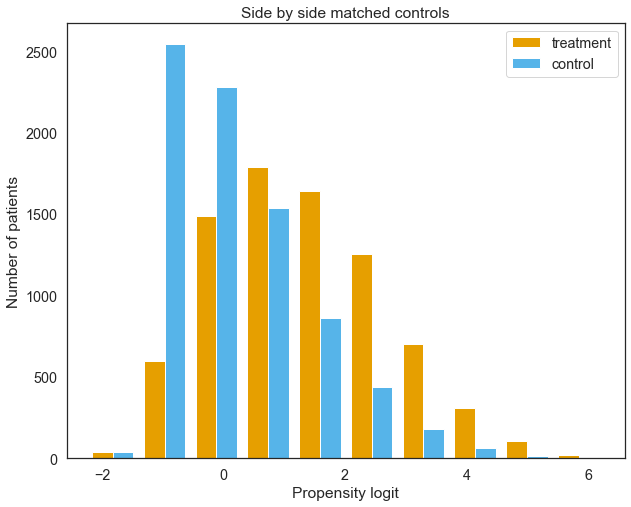

In [190]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

In [191]:
df_psm.propensity_logit.describe()

count    25169.000000
mean        -0.628985
std          2.243839
min         -7.735802
25%         -2.261161
50%         -0.522952
75%          0.959179
max          6.271355
Name: propensity_logit, dtype: float64

## Plot the effect sizes

In [192]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [193]:
matched_df = psm.df_matched

In [194]:
matched_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  
0          0.251637         -1.089902        1  
1          0.694992          0.823564        1  
2          0.909691          2.309862        1  
3          0.948987          2.923323        1  
4          0.510450          0.041807        1

In [195]:
matched_df.shape

(15917, 16)

## Matched Ids

In [196]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  51cfc548-ec0e-460a-bf1d-89f9ca915b99
1  039ff346-b163-4f39-8e64-dca1f76f794e  1a6263b3-7beb-4e30-b6fe-c47a8c9be7e3
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  57e07502-9ba9-4253-91aa-c955e6cb1e16
3  4d71b500-d898-4675-a9f0-218fe5dee40f  87880f22-4949-4dcf-880e-b82155ddb920
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  7bf77c6d-c504-4b06-8e93-107d84435988

## Effect sizes per variables

In [197]:
psm.effect_size

Variable matching  Effect Size
0                age   before    -0.016373
1                age    after    -0.070488
2                sex   before     0.034172
3                sex    after     0.026294
4                ICU   before     0.160419
5                ICU    after     0.112436
6   bl_albumin_value   before    -1.442501
7   bl_albumin_value    after    -0.726161
8             hgb_bl   before    -0.132837
9             hgb_bl    after     0.112797
10      beta_blocker   before     0.042858
11      beta_blocker    after     0.010637
12         Cirrhosis   before     0.337439
13         Cirrhosis    after     0.082070
14               CCI   before     0.313853
15               CCI    after     0.094910
16             qSOFA   before     0.201114
17             qSOFA    after     0.106830
18              MELD   before     0.512404
19              MELD    after     0.223685
20              SEWS   before     0.137893
21              SEWS    after     0.089289
22              ACLF   before     0.490319
23              ACLF    after     0.267842

## Explore Matched df

In [198]:
matched_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  
0          0.251637         -1.089902        1  
1          0.694992          0.823564        1  
2          0.909691          2.309862        1  
3          0.948987          2.923323        1  
4          0.510450          0.041807        1

In [199]:
matched_df.albumin.value_counts()

1    7959
0    7958
Name: albumin, dtype: int64

In [200]:
matched_df.shape

(15917, 16)

## Join Matched df with earlier df on encounterid to add outcome variables

In [201]:
f_df = matched_df.merge(df_o, on='encounterid', how='left')

In [202]:
f_df.shape

(15917, 21)

In [203]:
f_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  \
0          0.251637         -1.089902        1   
1          0.694992          0.823564        1   
2          0.909691          2.309862        1   
3          0.948987          2.923323        1   
4          0.510450          0.041807        1   

                               personid  LOS_days  90_day_mortality  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  3.039583                 1   
1  016db409-ef15-4326-a6e6-9661b6992976  5.045833                 1   
2  09264b14-79e8-47d4-85ea-9e46696f953f  6.143056                 0   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4.893056                 1   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  3.818056                 1   

   90_day_readmission  hospital_free_days  
0                 0.0                   0  
1                 0.0                   0  
2                 1.0                  12  
3                 0.0                   0  
4                 0.0                   0

In [204]:
# rearrange columns

print(f_df.columns.to_list())

['encounterid', 'age', 'sex', 'ICU', 'bl_albumin_value', 'hgb_bl', 'beta_blocker', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'SEWS', 'ACLF', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']


In [205]:
f_df = f_df[['personid', 'encounterid', 'age', 'sex', 'ICU', 'bl_albumin_value', \
             'hgb_bl', 'beta_blocker', 'Cirrhosis', 'CCI', \
             'qSOFA', 'MELD', 'SEWS', 'ACLF', 'albumin', \
             'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']]

In [206]:
f_df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
0  68.0    1    0               2.8    11.5             0          1    3   
1  58.0    1    0               2.6    11.6             0          1    7   
2  44.0    1    0               1.3     3.8             1          1    3   
3  83.0    0    1               1.7    11.6             0          0    4   
4  37.0    0    1               2.7    15.5             0          0    2   

   qSOFA    MELD  SEWS  ACLF  albumin  LOS_days  90_day_mortality  \
0      0  23.508     0     0        1  3.039583                 1   
1      1  31.904     1     3        1  5.045833                 1   
2      0  28.610     0     0        1  6.143056                 0   
3      2  21.000     2     3        1  4.893056                 1   
4      2  22.640     3     1        1  3.818056                 1   

   90_day_readmission  hospital_free_days  
0                 0.0                   0  
1                 0.0                   0  
2                 1.0                  12  
3                 0.0                   0  
4                 0.0                   0

In [207]:
f_df[f_df['albumin'] == 1].bl_albumin_value.describe()

count    7959.000000
mean        2.199061
std         0.468484
min         0.600000
25%         1.900000
50%         2.300000
75%         2.600000
max         2.900000
Name: bl_albumin_value, dtype: float64

In [208]:
f_df[f_df['albumin'] == 0].bl_albumin_value.describe()

count    7958.000000
mean        2.539203
std         0.468338
min         0.600000
25%         2.300000
50%         2.600000
75%         2.900000
max         3.800000
Name: bl_albumin_value, dtype: float64

In [210]:
f_df.shape

(15917, 19)

In [209]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/PSM/Tables/K72_HF_MATCHED.csv', index=False)